Machine Learning and Statistics

Winter 2023

by Ioan Domsa

***

## Task 1

***

> Square roots are difficult to calculate. In Python, you typically use the power operator (a double asterisk) or a package such
as `math`. In this task you should write a function `sqrt(x)` to approximate the square root of a floating point number x without
using the power operator or a package.

>Rather, you should use the Newton’s method. Start with an initial guess for the square root called $z_0$. You then repeatedly
improve it using the following formula, until the difference between some previous guess $z_{i}$ and the next $z_{i+1}$
is less than some threshold, say 0.01.

$$ z_{i+1} = z_i − \frac {z_i × z_i − x}{2z_i} $$


In [1]:
def sqrt(x):
    # Initial guess for the square root.
    z1 = x / 2.0
    # set a threshold of approximation
    t = 0.0000001
    # counter
    # c = 0

# Loop until we are accurate enough
    while True:
        # Newtons method
        z2 = z1 - ((z1*z1)-x)/(2*z1)
        # c = c + 1 
        # check the threshold
        if abs(z2-z1) <= t:
            break
        z1 = z2
    # return z2, c
    return z2

x = 3
# result, count = sqrt(x)
result = sqrt(x)
print(result)
# print(count)

1.7320508075688772


In [2]:
# Test function
sqrt(3)

1.7320508075688772

In [3]:
# Check Python's value for square root of 3
3**0.5

1.7320508075688772

### Notes

***

1. The calculation $ z^2 - x $ is exactly zero when $z$ is the sqare root of $x$. It is greater than zero when $z$ is too big. It is less than zero when $z$ is too small. Thus $(z^2 -x)^2$ is a good candidate for a cost function.

2. The derivative of the numerator $z^2 - x$ with respect to $z$ is $2z$. That is the denominator of the fraction in the formula from the question

***

## Task 2

***

> Consider the below contingency table based on a survey asking respondents whether they prefer coffee or tea and whether they prefer plain or chocolate biscuits.

>Use scipy.stats to perform a chi-squared test to see whether there is any evidence of an association between drink preference and biscuit preference in this instance.

|           	|            	|  **Biscuit** 	|              	|  
|:---------:	|:----------:	|:------------:	|:---------:	|  
|           	|            	| Chocolate     | Plain      	|  
| **Drink** 	| Coffee 	    |      43      	|     57    	|  
|           	| Tea  	        |      56      	|     45    	|  

In [4]:
# Data frames.
import pandas as pd

# Shuffles.
import random

# Statistics.
import scipy.stats as ss

In [5]:
# 43 coffee drinkers who preferred chocolate biscuit
coffee_choc = [["coffee", "chocolate"]] * 43

# Show
coffee_choc

[['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 

In [6]:
# 56 tea drinkers who preferred chocolate biscuit
tea_choc = [["tea", "chocolate"]] * 56

# Show
tea_choc

[['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'c

In [7]:
# 57 coffee drinkers who preferred plain biscuit
coffee_plain = [["coffee", "plain"]] * 57

# Show
coffee_plain

[['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee'

In [8]:
# 45 tea drinkers who preferred plain biscuit
tea_plain = [["tea", "plain"]] * 45

# Show
tea_plain

[['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain']]

In [9]:
# Raw data, merge the four lists

raw_data = coffee_choc + coffee_plain + tea_choc + tea_plain

# show raw data
raw_data

[['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 

In [10]:
# Shuffle the data

random.shuffle(raw_data)

# show raw_data
raw_data

[['tea', 'chocolate'],
 ['coffee', 'chocolate'],
 ['tea', 'chocolate'],
 ['coffee', 'plain'],
 ['tea', 'plain'],
 ['coffee', 'chocolate'],
 ['coffee', 'plain'],
 ['tea', 'plain'],
 ['coffee', 'chocolate'],
 ['coffee', 'plain'],
 ['tea', 'plain'],
 ['coffee', 'plain'],
 ['tea', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'chocolate'],
 ['tea', 'plain'],
 ['coffee', 'chocolate'],
 ['tea', 'chocolate'],
 ['coffee', 'plain'],
 ['tea', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['coffee', 'plain'],
 ['tea', 'plain'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'plain'],
 ['tea', 'chocolate'],
 ['coffee', 'chocolate'],
 ['coffee', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'plain'],
 ['coffee', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['tea', 'chocolate'],
 ['te

In [11]:
# Zip the list - make the rows columns and the columns rows
# Interchange the outer and inner lists
drink, biscuit = list(zip(*raw_data))

# Show drink, biscuit
drink, biscuit

(('tea',
  'coffee',
  'tea',
  'coffee',
  'tea',
  'coffee',
  'coffee',
  'tea',
  'coffee',
  'coffee',
  'tea',
  'coffee',
  'tea',
  'coffee',
  'coffee',
  'coffee',
  'coffee',
  'tea',
  'coffee',
  'tea',
  'coffee',
  'tea',
  'coffee',
  'coffee',
  'tea',
  'tea',
  'coffee',
  'coffee',
  'coffee',
  'tea',
  'tea',
  'tea',
  'tea',
  'tea',
  'tea',
  'tea',
  'coffee',
  'coffee',
  'tea',
  'tea',
  'coffee',
  'tea',
  'tea',
  'tea',
  'tea',
  'coffee',
  'tea',
  'coffee',
  'tea',
  'tea',
  'tea',
  'tea',
  'tea',
  'tea',
  'tea',
  'coffee',
  'tea',
  'tea',
  'coffee',
  'coffee',
  'tea',
  'coffee',
  'tea',
  'tea',
  'tea',
  'tea',
  'coffee',
  'coffee',
  'tea',
  'coffee',
  'coffee',
  'tea',
  'coffee',
  'coffee',
  'tea',
  'coffee',
  'coffee',
  'tea',
  'coffee',
  'tea',
  'coffee',
  'tea',
  'coffee',
  'coffee',
  'coffee',
  'tea',
  'coffee',
  'tea',
  'coffee',
  'tea',
  'coffee',
  'tea',
  'coffee',
  'coffee',
  'tea',
  'coffee'

In [12]:
# create a data frame
df = pd.DataFrame({"drink": drink, "biscuit": biscuit})

# show
df

,drink,biscuit
0,tea,chocolate
1,coffee,chocolate
2,tea,chocolate
3,coffee,plain
4,tea,plain
...,...,...
196,coffee,chocolate
197,coffee,chocolate
198,coffee,plain
199,tea,chocolate


In [13]:
# perform cross tab contingency
cross = ss.contingency.crosstab(df["drink"], df["biscuit"])

# show
cross

CrosstabResult(elements=(array(['coffee', 'tea'], dtype=object), array(['chocolate', 'plain'], dtype=object)), count=array([[43, 57],
       [56, 45]]))

In [14]:
# The counts.
cross.count

array([[43, 57],
       [56, 45]])

In [15]:
# The first variable and the second

first, second = cross.elements

#show
first, second

(array(['coffee', 'tea'], dtype=object),
 array(['chocolate', 'plain'], dtype=object))

In [16]:
# Do the statistics.
result = ss.chi2_contingency(cross.count, correction = False)

# Show.
result

Chi2ContingencyResult(statistic=3.113937364324669, pvalue=0.07762509678333357, dof=1, expected_freq=array([[49.25373134, 50.74626866],
       [49.74626866, 51.25373134]]))

In [17]:
# The expected frequesncies if independent
result.expected_freq

array([[49.25373134, 50.74626866],
       [49.74626866, 51.25373134]])

In [18]:
# Preferd chocolate biscuits irespective of drink.
99 / 201

0.4925373134328358

In [19]:
# If no relationship between drink and biscuit, 
# then we should have same proportion of coffee drinkers
# liking chocolate biscuits as we have overall
100 * (99 / 201)

49.25373134328358

In [20]:
# If no relationship between drink and biscuit, 
# then we should have same proportion of peopple 
# liking plain biscuit who are tea drinkers as we have overall
102 * (101 / 201)

51.25373134328359

## Task 3

***

> Perform a t-test on the famous penguins data set to investigate 

> whether there is evidence of a significant difference in the body mass of male and female gentoo penguins.

In [21]:
# numerical arays
import numpy as np

In [22]:
# Load Penguins
df = pd.read_csv('notes/data/penguins.csv')

# Show
df

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [23]:
# Gentoo male body mass

df_gentoo = df[df["species"] == "Gentoo"]

df_gentoo

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
220,Gentoo,Biscoe,46.1,13.2,211.0,4500.0,FEMALE
221,Gentoo,Biscoe,50.0,16.3,230.0,5700.0,MALE
222,Gentoo,Biscoe,48.7,14.1,210.0,4450.0,FEMALE
223,Gentoo,Biscoe,50.0,15.2,218.0,5700.0,MALE
224,Gentoo,Biscoe,47.6,14.5,215.0,5400.0,MALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [24]:
# Gentoo Male mass
sample_male = df_gentoo.loc[df_gentoo['sex'] == 'MALE']['body_mass_g'].to_numpy()

count_sample_male = len(sample_male)
count_sample_male, sample_male

(61,
 array([5700., 5700., 5400., 5200., 5150., 5550., 5850., 5850., 6300.,
        5350., 5700., 5050., 5100., 5650., 5550., 5250., 6050., 5400.,
        5250., 5350., 5700., 4750., 5550., 5400., 5300., 5300., 5000.,
        5050., 5000., 5550., 5300., 5650., 5700., 5800., 5550., 5000.,
        5100., 5800., 6000., 5950., 5450., 5350., 5600., 5300., 5550.,
        5400., 5650., 5200., 4925., 5250., 5600., 5500., 5500., 5500.,
        5500., 5950., 5500., 5850., 6000., 5750., 5400.]))

In [25]:
# Gentoo Female mass
sample_female = df_gentoo.loc[df_gentoo['sex'] == 'FEMALE']['body_mass_g'].to_numpy()

count_sample_female = len(sample_female)
count_sample_female, sample_female

(58,
 array([4500., 4450., 4550., 4800., 4400., 4650., 4650., 4200., 4150.,
        4800., 5000., 4400., 5000., 4600., 4700., 5050., 5150., 4950.,
        4350., 3950., 4300., 4900., 4200., 5100., 4850., 4400., 4900.,
        4300., 4450., 4200., 4400., 4700., 4700., 4750., 5200., 4700.,
        4600., 4750., 4625., 4725., 4750., 4600., 4875., 4950., 4750.,
        4850., 4875., 4625., 4850., 4975., 4700., 4575., 5000., 4650.,
        4375., 4925., 4850., 5200.]))

In [26]:
# Perform t-test

ss.ttest_ind(sample_male, sample_female)

TtestResult(statistic=14.721676481405709, pvalue=2.133687602018886e-28, df=117.0)

> The t-test above sugests significant diference between the body mass of the two gender samples analysed.
> the statistic value of 14 shows a large difference between the means of the two samples.
> the small pvalue, close to 0 shows the probanility is very low

## Task 4

***

> Using the famous iris data set suggest whether the setosa class is easily separable from the other two classes.

> Provide evidence for your answer.

In [27]:
# Data frames.
import pandas as pd
# Machine Learning
import sklearn as sk
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics

In [28]:
# Load iris data set
df = pd.read_csv('notes/data/iris.csv')
df = df.dropna()
# Show
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [29]:
# The X values
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] 
# Show X
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [30]:
# y values.
y = df['class']
# Show
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: class, Length: 150, dtype: object

In [31]:
# Create a new instance of a classifier
clf = KNeighborsClassifier()
# Fit the data
clf.fit(X, y)

KNeighborsClassifier()

In [32]:
# Quick check that the classifier correctly predicts first X sample
clf.predict(X.iloc[:1])

array(['setosa'], dtype=object)

In [33]:
# The actual output for the first sample.
y.iloc[0]

'setosa'

In [34]:
# Keep some samples back for testing, train on the others.
X_train, X_test, y_train, y_test = sk.model_selection.train_test_split(X, y)
X_train

,sepal_length,sepal_width,petal_length,petal_width
65,6.7,3.1,4.4,1.4
101,5.8,2.7,5.1,1.9
123,6.3,2.7,4.9,1.8
48,5.3,3.7,1.5,0.2
45,4.8,3.0,1.4,0.3
...,...,...,...,...
130,7.4,2.8,6.1,1.9
114,5.8,2.8,5.1,2.4
74,6.4,2.9,4.3,1.3
149,5.9,3.0,5.1,1.8


In [35]:
# Training outputs.
y_train

65     versicolor
101     virginica
123     virginica
48         setosa
45         setosa
          ...    
130     virginica
114     virginica
74     versicolor
149     virginica
55     versicolor
Name: class, Length: 112, dtype: object

In [36]:
# Create a new instance of a classifier.
clf = sk.neighbors.KNeighborsClassifier()

# Fit the data.
clf.fit(X_train, y_train)

KNeighborsClassifier()

In [37]:
# Predict based on test set.
y_pred = clf.predict(X_test)
y_pred

array(['versicolor', 'virginica', 'versicolor', 'virginica', 'setosa',
       'versicolor', 'virginica', 'setosa', 'setosa', 'setosa',
       'virginica', 'setosa', 'setosa', 'versicolor', 'setosa', 'setosa',
       'versicolor', 'setosa', 'virginica', 'virginica', 'versicolor',
       'setosa', 'versicolor', 'versicolor', 'setosa', 'virginica',
       'virginica', 'virginica', 'virginica', 'setosa', 'setosa',
       'versicolor', 'virginica', 'virginica', 'setosa', 'virginica',
       'virginica', 'versicolor'], dtype=object)

In [38]:
# Proportion of correct classifications on test set.
(clf.predict(X_test) == y_test).sum() / X_test.shape[0]

0.9736842105263158

In [39]:
y_test == 'setosa'

60     False
140    False
94     False
119    False
42      True
63     False
118    False
40      True
16      True
19      True
112    False
14      True
46      True
56     False
30      True
17      True
98     False
22      True
148    False
131    False
99     False
49      True
71     False
50     False
6       True
138    False
109    False
107    False
145    False
27      True
13      True
91     False
72     False
103    False
18      True
125    False
139    False
77     False
Name: class, dtype: bool

In [40]:
y_pred == 'setosa'

array([False, False, False, False,  True, False, False,  True,  True,
        True, False,  True,  True, False,  True,  True, False,  True,
       False, False, False,  True, False, False,  True, False, False,
       False, False,  True,  True, False, False, False,  True, False,
       False, False])

In [41]:
setosa_test = (y_test == 'setosa')
setosa_test.sum()

14

In [42]:
setosa_pred = (y_pred == 'setosa')
setosa_pred.sum()

14

In [43]:
# Calculate proportion to understand if setosa is easily separable from other classes 
setosa_acc = setosa_test.sum() / setosa_pred.sum()
setosa_acc

1.0

Another way to investigate the setosa class could be by using Plot visualization 

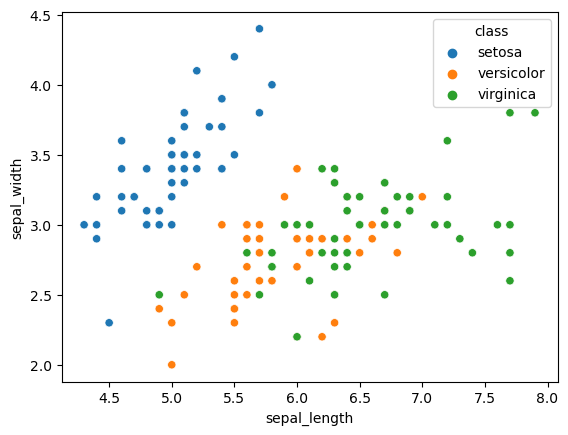

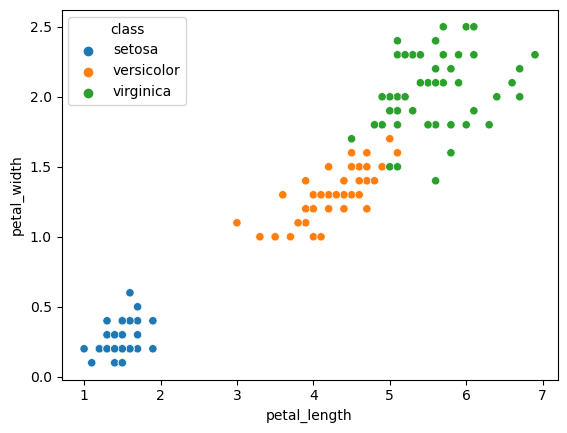

<Figure size 640x480 with 0 Axes>

In [44]:
# Plot using Seaborn

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# scatter plot sepal_length vs sepal_width
sns.scatterplot(x='sepal_length', y='sepal_width', hue ='class', data=df )
plt.show()
plt.clf()

# scatter plot petal_length vs petal_widt
sns.scatterplot(x='petal_length', y='petal_width', hue ='class', data=df )
plt.show()
plt.clf()

Above plots show that setosa class is easily separable from other classes

## Task 5

***

> Perform Principal Component Analysis on the iris data set, reducing the number of dimensions to two.

> Explain the purpose of the analysis and your results.

In [45]:
# Data frames.
import pandas as pd

# Machine Learning
import sklearn as sk

# Preprocessing
import sklearn.preprocessing as pre

# Decomposition
import sklearn.decomposition as dec

# Statistical test.
import scipy.stats as ss

# Plots
import matplotlib.pyplot as plt

# Statistical plots.
import seaborn as sns

In [46]:
# 1. Load iris data set and drop NaNs
df = pd.read_csv('notes/data/iris.csv').dropna()
# Show
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [47]:
# The X values; independent variables
X = df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']] 
# Show X
X

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [48]:
X.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width'], dtype='object')

In [49]:
# 2. Standardize the data
scaler = pre.StandardScaler()
scaler.fit(X)
X_transformed = scaler.transform(X)
X_transformed

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

In [50]:
# Re-create the data frame
df_X_transformed = pd.DataFrame(X_transformed, columns = X.columns)
# Show
df_X_transformed

,sepal_length,sepal_width,petal_length,petal_width
0,-0.900681,1.032057,-1.341272,-1.312977
1,-1.143017,-0.124958,-1.341272,-1.312977
2,-1.385353,0.337848,-1.398138,-1.312977
3,-1.506521,0.106445,-1.284407,-1.312977
4,-1.021849,1.263460,-1.341272,-1.312977
...,...,...,...,...
145,1.038005,-0.124958,0.819624,1.447956
146,0.553333,-1.281972,0.705893,0.922064
147,0.795669,-0.124958,0.819624,1.053537
148,0.432165,0.800654,0.933356,1.447956


In [51]:
# 3. Perform PCA 
# Ceate a new PCA instance
pca = dec.PCA(n_components=2)
X_pca = pca.fit_transform(df_X_transformed)
X_pca

array([[-2.26454173e+00,  5.05703903e-01],
       [-2.08642550e+00, -6.55404729e-01],
       [-2.36795045e+00, -3.18477311e-01],
       [-2.30419716e+00, -5.75367713e-01],
       [-2.38877749e+00,  6.74767397e-01],
       [-2.07053681e+00,  1.51854856e+00],
       [-2.44571134e+00,  7.45626750e-02],
       [-2.23384186e+00,  2.47613932e-01],
       [-2.34195768e+00, -1.09514636e+00],
       [-2.18867576e+00, -4.48629048e-01],
       [-2.16348656e+00,  1.07059558e+00],
       [-2.32737775e+00,  1.58587455e-01],
       [-2.22408272e+00, -7.09118158e-01],
       [-2.63971626e+00, -9.38281982e-01],
       [-2.19229151e+00,  1.88997851e+00],
       [-2.25146521e+00,  2.72237108e+00],
       [-2.20275048e+00,  1.51375028e+00],
       [-2.19017916e+00,  5.14304308e-01],
       [-1.89407429e+00,  1.43111071e+00],
       [-2.33994907e+00,  1.15803343e+00],
       [-1.91455639e+00,  4.30465163e-01],
       [-2.20464540e+00,  9.52457317e-01],
       [-2.77416979e+00,  4.89517027e-01],
       [-1.

In [52]:
# Original classification
df_pca = pd.DataFrame(df['class'])
# Show
df_pca

,class
0,setosa
1,setosa
2,setosa
3,setosa
4,setosa
...,...
145,virginica
146,virginica
147,virginica
148,virginica


In [53]:
# Incoroprate PCA variables
df_pca['pca0'] = X_pca[:, 0]
df_pca['pca1'] = X_pca[:, 1]
df_pca

,class,pca0,pca1
0,setosa,-2.264542,0.505704
1,setosa,-2.086426,-0.655405
2,setosa,-2.367950,-0.318477
3,setosa,-2.304197,-0.575368
4,setosa,-2.388777,0.674767
...,...,...,...
145,virginica,1.870522,0.382822
146,virginica,1.558492,-0.905314
147,virginica,1.520845,0.266795
148,virginica,1.376391,1.016362


> By performing Principal Component Analysis on the iris data set the dimensionality of the data set is reduced from 4 to 2 as shown above

> Tow dimensions is easier for visualizing, plotting and understanding the data. 

c:\ProgramData\Anaconda3\lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


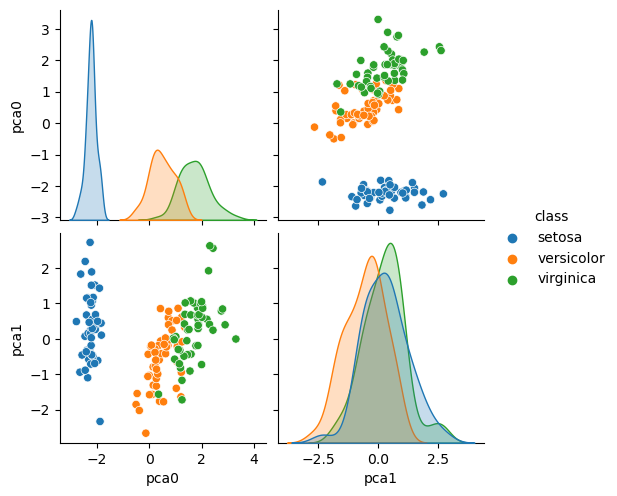

In [54]:
# 4. Pair plot
sns.pairplot(df_pca, hue = 'class')

> The plots using two principal components helps in visualizing data set class distribution.
> It is easy to observe that setosa is easily separable from the other classes.

In [55]:
pca.explained_variance_

array([2.93035378, 0.92740362])

In [56]:
pca.explained_variance_ratio_

array([0.72770452, 0.23030523])

> by running explained_variance attribute we can see:

> first principal component contains 72.77% percent of the variance

> seccond principal component contains 23.03% percent of the variance

> The two principal components contain over 95% of the information

***
## End
